# **Title:**
"Telco Customer Churn"

# **Problem Statement**:
The goal is to analyze and predict customer churn. Customer churn refers to the loss of customers who discontinue their subscription or services. By understanding the patterns and factors influencing churn, the company can take proactive measures to retain customers.



# **1.Understand The Data**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# **Features:**

**customerID**: Unique identifier for each customer.

**gender**: Gender of the customer (Male/Female).

**SeniorCitizen**: Indicates if the customer is a senior citizen (1 = Yes, 0 = No).

**Partner**: Indicates if the customer has a partner (Yes/No).

**Dependents**: Indicates if the customer has dependents (Yes/No).

**tenure**: Number of months the customer has been with the company.

**PhoneService**: Indicates if the customer has phone service (Yes/No).

**MultipleLines**: Indicates if the customer has multiple lines (No phone service/No/Yes).

**InternetService**: Type of internet service (DSL, Fiber optic, No).

**OnlineSecurity**: Indicates if the customer has online security (Yes/No/No internet service).

**OnlineBackup**: Indicates if the customer has online backup (Yes/No/No internet service).

**DeviceProtection**: Indicates if the customer has device protection (Yes/No/No internet service).

**TechSupport**: Indicates if the customer has technical support (Yes/No/No internet service).

**StreamingTV**: Indicates if the customer has streaming TV service (Yes/No/No internet service).

**StreamingMovies**: Indicates if the customer has streaming movie service (Yes/No/No internet service).

**Contract**: Type of contract (Month-to-month, One year, Two year).
PaperlessBilling: Indicates if the customer uses paperless billing (Yes/No).

**PaymentMethod**: Payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).

**MonthlyCharges**: Monthly charges incurred by the customer.

**TotalCharges**: Total charges incurred by the customer (note: may need cleaning if it contains invalid values).

**Churn**: Indicates whether the customer churned (Yes/No).



In [ ]:
df=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# **Objectives:**
**Descriptive Analysis:** Identify patterns in customer churn.

**Predictive Analysis:** Build a machine learning model to predict whether a customer is likely to churn based on the available features.

**Strategic Insights**: Provide actionable insights to reduce customer churn.


In [ ]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
df.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Replace empty strings with NaN and then convert to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').astype('float64')

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
7038,False
7039,False
7040,False
7041,False


# **2.Data Cleaning**

In [ ]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [ ]:
df['customerID']=label.fit_transform(df['customerID'])
df['gender']=label.fit_transform(df['gender'])
df['Partner']=label.fit_transform(df['Partner'])
df['Dependents']=label.fit_transform(df['Dependents'])
df['PhoneService']=label.fit_transform(df['PhoneService'])
df['MultipleLines']=label.fit_transform(df['MultipleLines'])
df['InternetService']=label.fit_transform(df['InternetService'])
df['OnlineSecurity']=label.fit_transform(df['OnlineSecurity'])
df['OnlineBackup']=label.fit_transform(df['OnlineBackup'])
df['DeviceProtection']=label.fit_transform(df['DeviceProtection'])
df['TechSupport']=label.fit_transform(df['TechSupport'])
df['StreamingTV']=label.fit_transform(df['StreamingTV'])
df['StreamingMovies']=label.fit_transform(df['StreamingMovies'])
df['Contract']=label.fit_transform(df['Contract'])
df['PaperlessBilling']=label.fit_transform(df['PaperlessBilling'])
df['PaymentMethod']=label.fit_transform(df['PaymentMethod'])
df['Churn']=label.fit_transform(df['Churn'])

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1990.50,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,7362.90,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,346.45,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,306.60,1


# **3.Data Descriptive**

In [ ]:
df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2266.771362,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,401.450000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3794.737500,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


# **4.Data Visualization**

array([[<Axes: title={'center': 'customerID'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'Partner'}>,
        <Axes: title={'center': 'Dependents'}>],
       [<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'PhoneService'}>,
        <Axes: title={'center': 'MultipleLines'}>,
        <Axes: title={'center': 'InternetService'}>,
        <Axes: title={'center': 'OnlineSecurity'}>],
       [<Axes: title={'center': 'OnlineBackup'}>,
        <Axes: title={'center': 'DeviceProtection'}>,
        <Axes: title={'center': 'TechSupport'}>,
        <Axes: title={'center': 'StreamingTV'}>,
        <Axes: title={'center': 'StreamingMovies'}>],
       [<Axes: title={'center': 'Contract'}>,
        <Axes: title={'center': 'PaperlessBilling'}>,
        <Axes: title={'center': 'PaymentMethod'}>,
        <Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>],
  

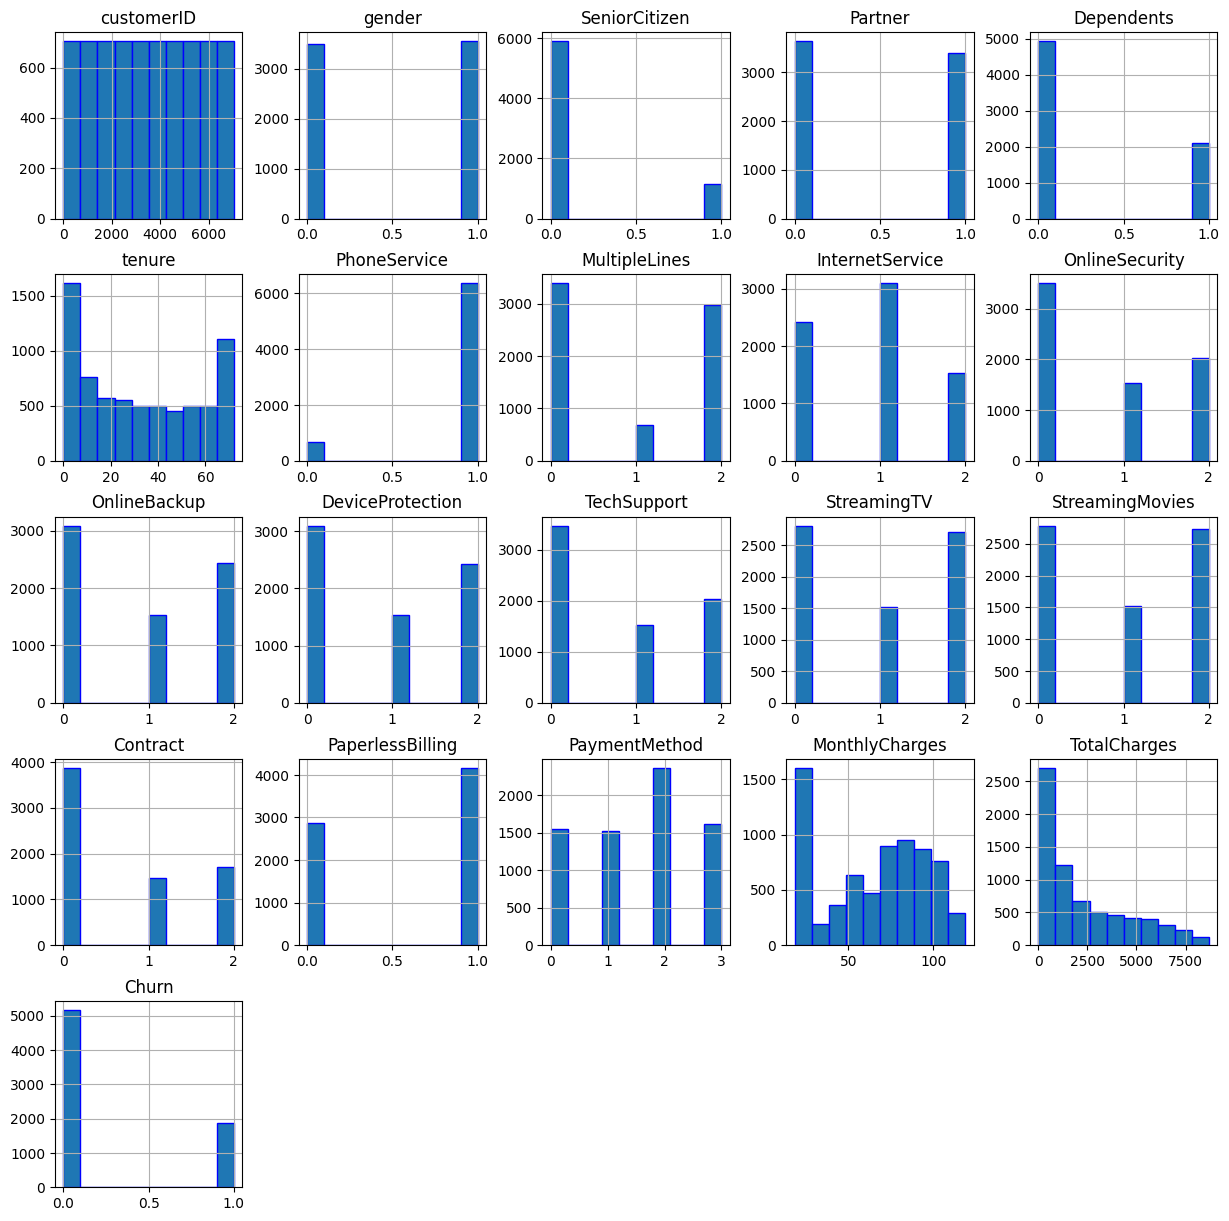

In [ ]:
df.hist(edgecolor='b',figsize=(15,15))

<Axes: xlabel='Churn', ylabel='count'>

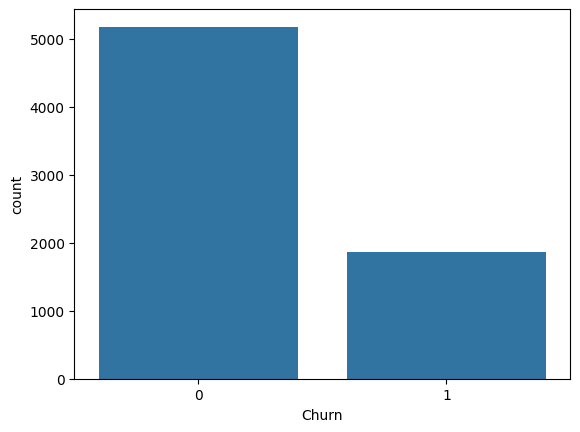

In [ ]:
sns.countplot(x='Churn',data=df)

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int64  
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [ ]:
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.model_selection import train_test_split

# Splitting the data into features (X) and target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']


# Applying SMOTE for oversampling
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)


X_resampled=pd.DataFrame(X_resampled,columns=X.columns)
y_resampled=pd.Series(y_resampled,name='Churn')
# concatenate  X_resampled is a DataFrame and y_resampled is series to allow
df=pd.concat([X_resampled,y_resampled],axis=1)
df



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.850000,29.850000,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.950000,1889.500000,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.850000,108.150000,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.300000,1840.750000,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.700000,151.650000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,3184,0,0,0,0,57,1,2,0,0,...,2,0,1,2,1,1,0,100.047871,5475.453064,1
10344,2870,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,2,66.967698,71.777337,1
10345,2135,0,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,2,53.856216,53.856216,1
10346,1769,1,0,0,0,60,1,2,1,0,...,0,1,2,0,1,1,2,94.496926,5636.564503,1


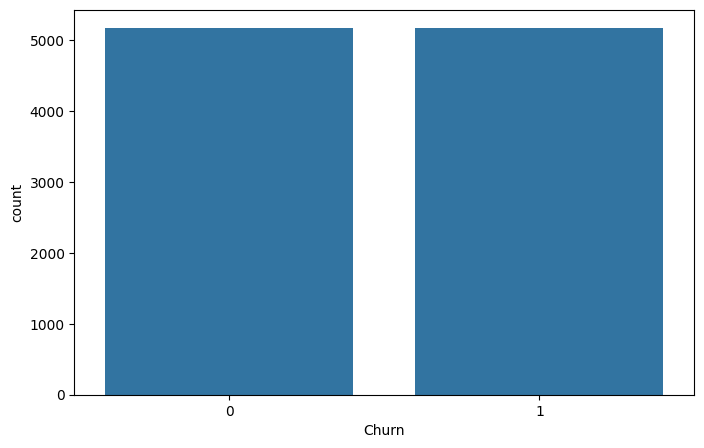

Churn
0    5174
1    5174
Name: count, dtype: int64


In [ ]:
# Plot the class distribution after oversampling
# Convert the oversampled target to a Pandas Series
y_resampled_series = pd.Series(y_resampled)

# Plot the class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=y_resampled_series)
plt.show()

# Display the count of each class
print(y_resampled_series.value_counts())


# **5.Correlation Analysis**

In [ ]:
correlation=df.corr()


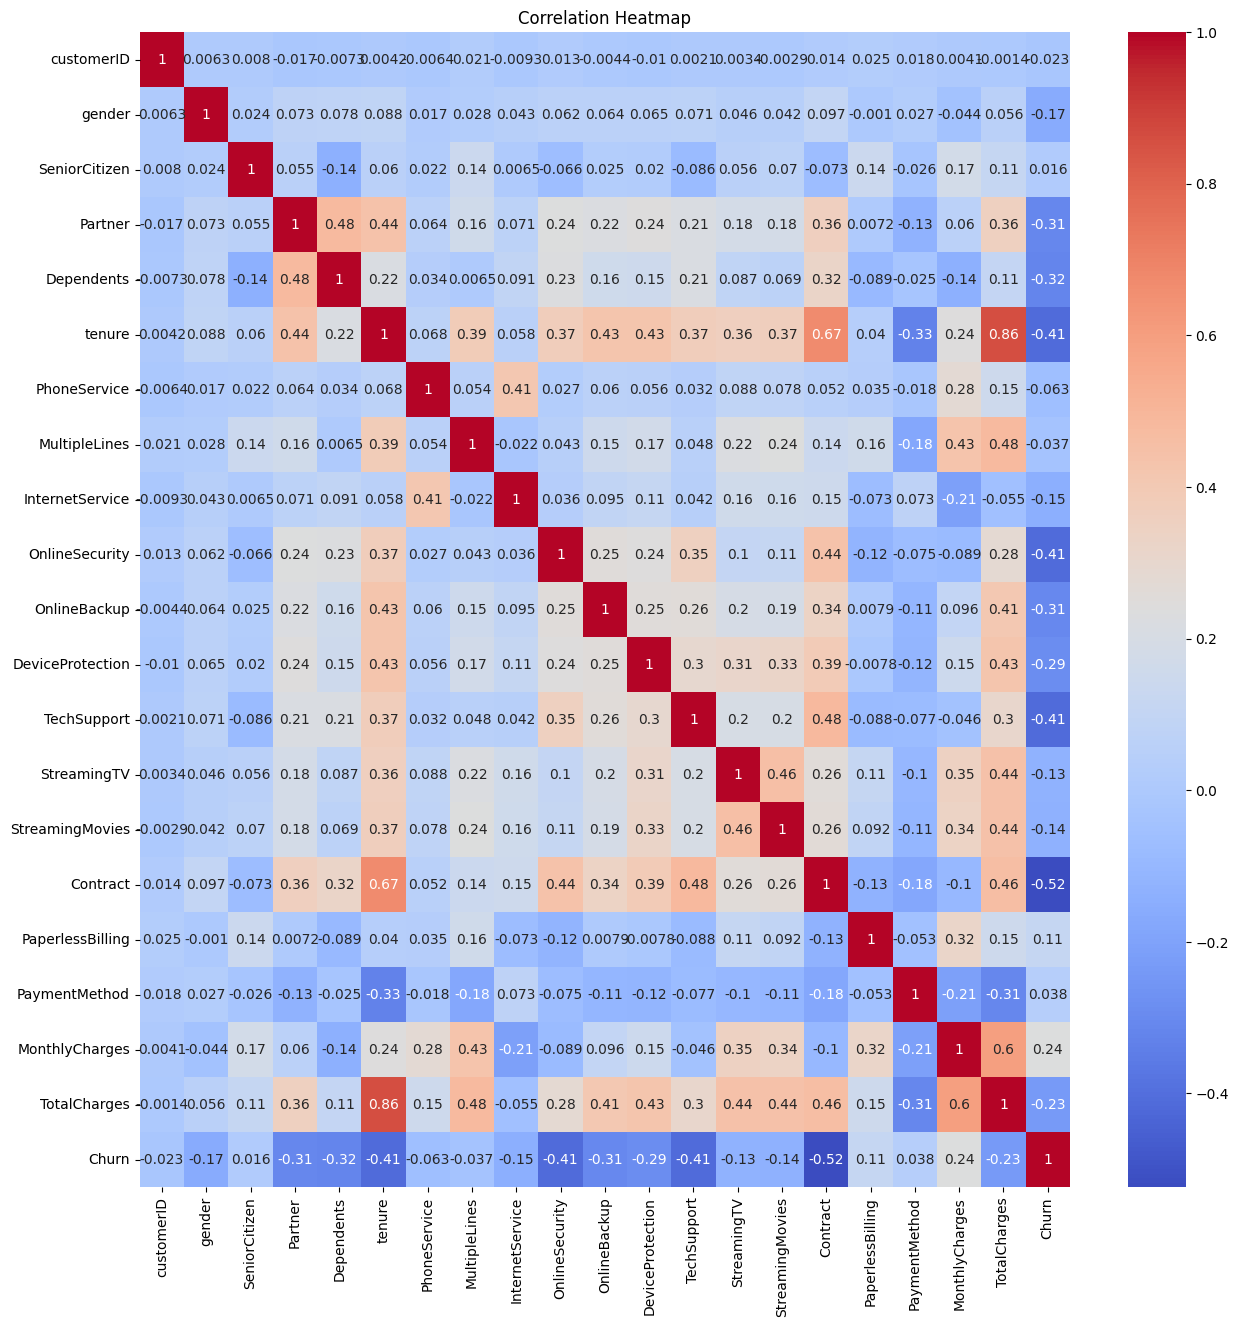

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(correlation,annot=True,cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df.drop(['customerID'],inplace=True,axis=1)
df.drop(['gender'],axis=1,inplace=True)
df.drop(['SeniorCitizen'],axis=1,inplace=True)
#df.drop(['Partner'],axis=1,inplace=True)
#df.drop(['Dependents'],axis=1,inplace=True)
df.drop(['PhoneService'],axis=1,inplace=True)
df.drop(['MultipleLines'],axis=1,inplace=True)
df.drop(['InternetService'],axis=1,inplace=True)
#df.drop(['OnlineBackup'],axis=1,inplace=True)
#df.drop(['DeviceProtection'],axis=1,inplace=True)
df.drop(['StreamingTV'],axis=1,inplace=True)
df.drop(['StreamingMovies'],axis=1,inplace=True)
df.drop(['PaperlessBilling'],axis=1,inplace=True)
df.drop(['PaymentMethod'],axis=1,inplace=True)
df.drop(['MonthlyCharges'],axis=1,inplace=True)
df.drop(['TotalCharges'],axis=1,inplace=True)
df

,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,Churn
0,1,0,1,0,2,0,0,0,0
1,0,0,34,2,0,2,0,1,0
2,0,0,2,2,2,0,0,0,1
3,0,0,45,2,0,2,2,1,0
4,0,0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
10343,0,0,57,0,2,2,0,1,1
10344,0,0,1,0,0,0,0,0,1
10345,0,0,1,0,0,0,0,0,1
10346,0,0,60,0,1,0,1,1,1


In [ ]:
df.shape

(10348, 9)

# **6.Outlier Detection**

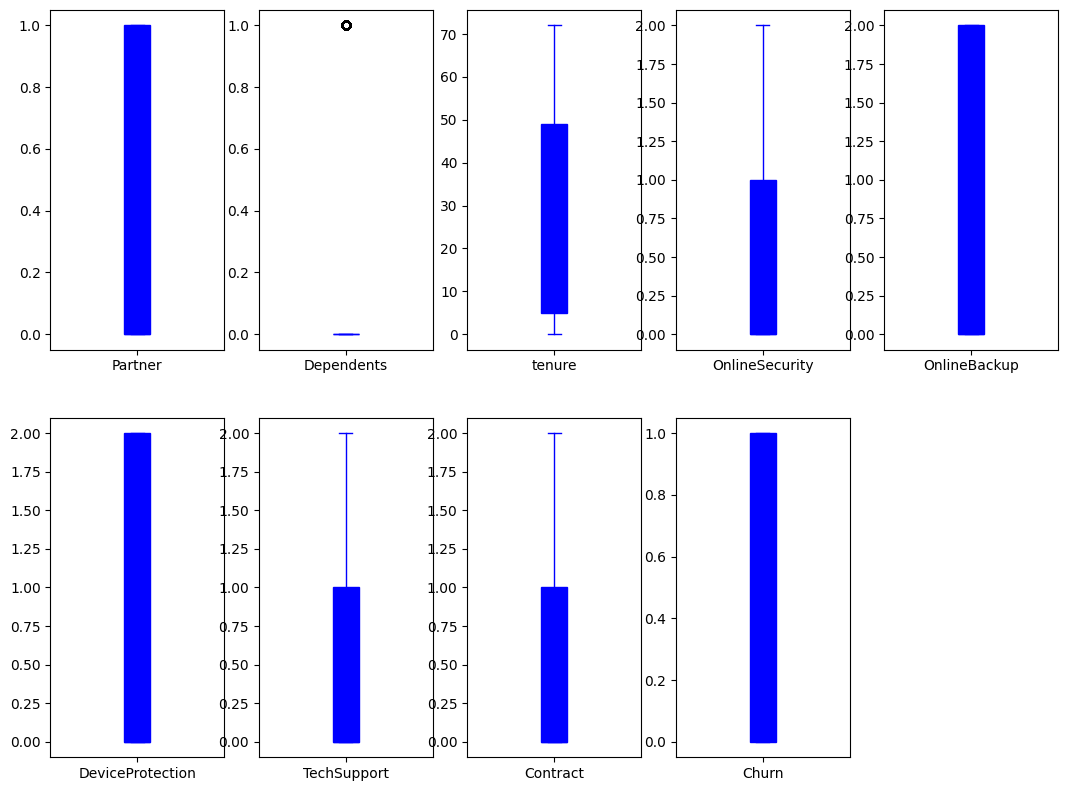

In [ ]:
df.plot(kind='box',subplots=True,layout=(3,5),figsize=(13,15),color='blue',patch_artist=True)
plt.show()

# **7.Feature engineer**

In [ ]:
data=np.log(df+1)

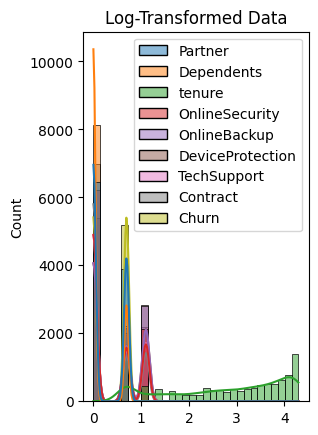

In [ ]:
# Plotting log-transformed data distribution
plt.subplot(1,2,2)
sns.histplot(data, bins=30, kde=True)
plt.title("Log-Transformed Data")
plt.show()

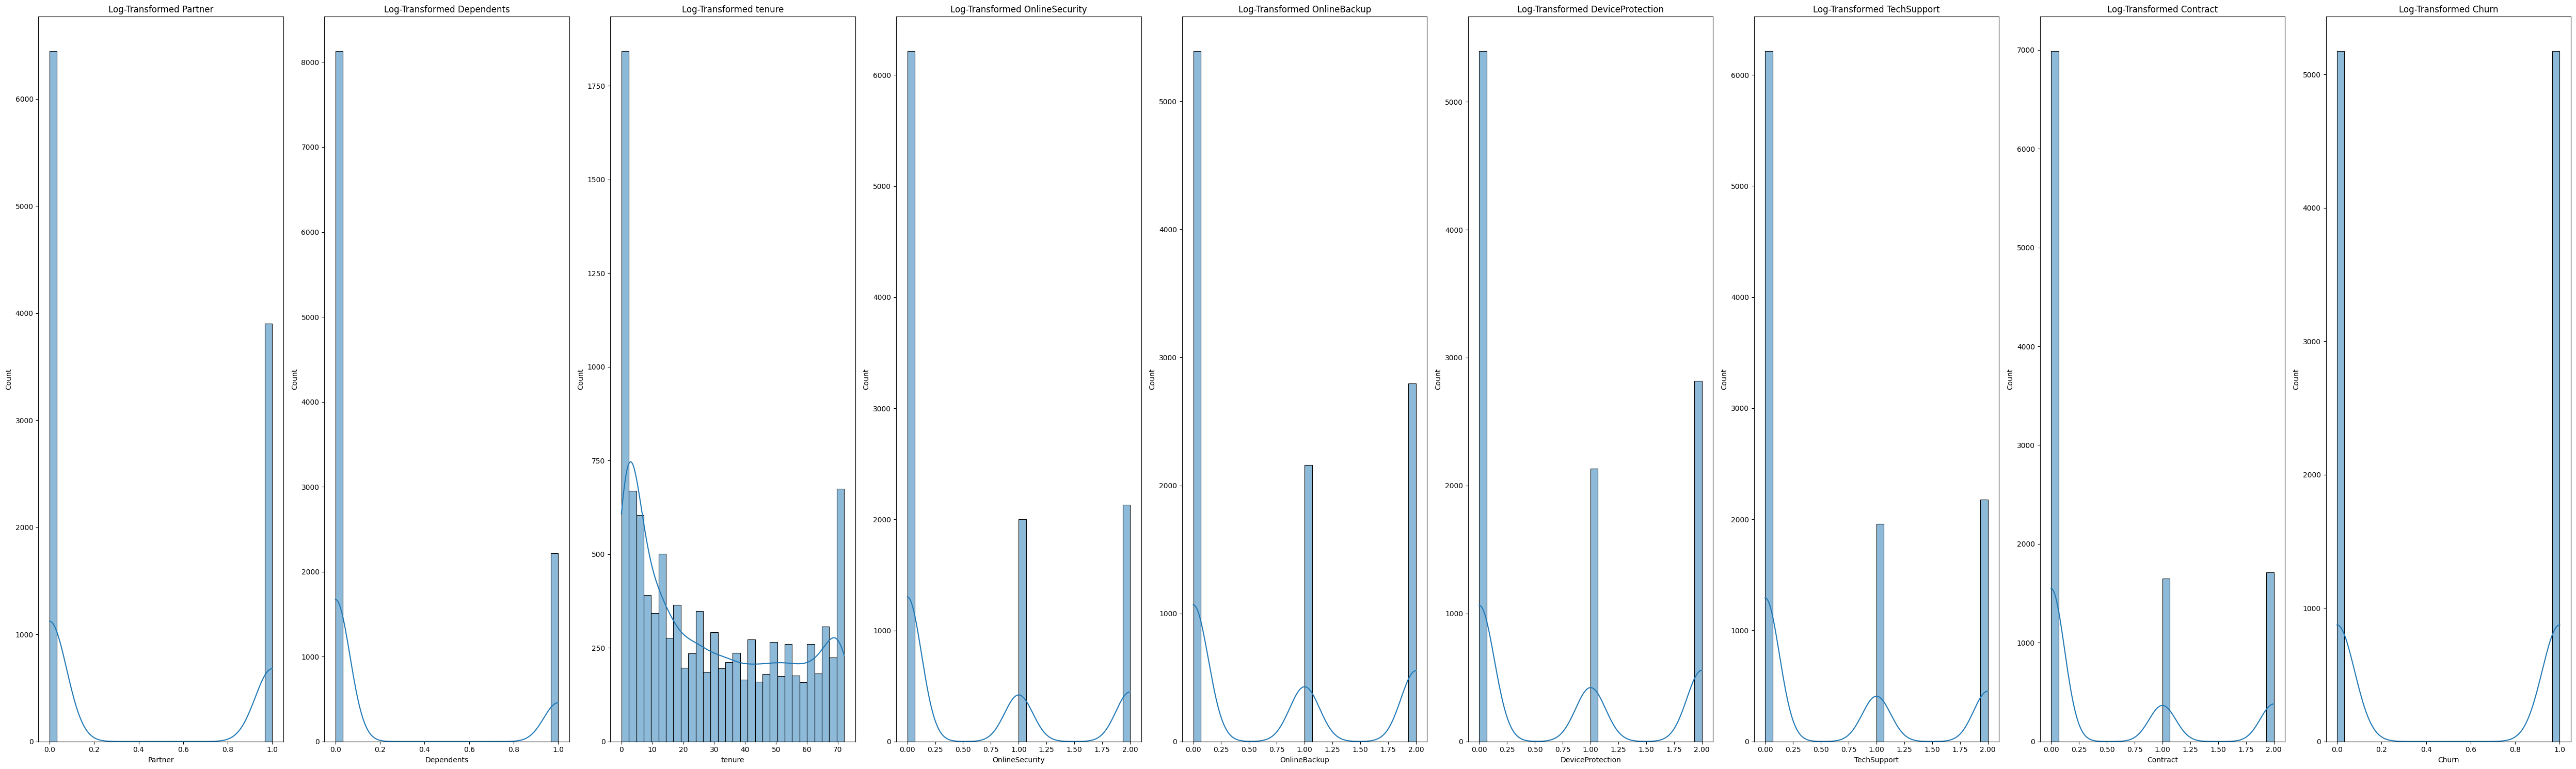

In [ ]:
# Assuming df is a DataFrame with multiple features
num_features = df.shape[1]  # Number of features
plt.figure(figsize=(50, 15))  # Adjust the figure size as needed

for i, column in enumerate(df.columns, 1):
    plt.subplot(1, num_features, i)  # Adjust layout for each feature
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f"Log-Transformed {column}")

plt.tight_layout()
plt.show()

# **8.Dimensionality Reduction**

In [ ]:
data['Churn'] = (data['Churn'] > 0.5).astype(int)
x=data.drop(['Churn'],axis=1)
y=data['Churn']

# **9.Data Scalling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x=pd.DataFrame(x,columns=data.drop(['Churn'],axis=1).columns)
y=data['Churn']

 # **10. Initial Modelling and Hypothesis Testing**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier,LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
model=RandomForestClassifier()
model.fit(x_train,y_train)


RandomForestClassifier()

In [ ]:
y_pred=model.predict(x_test)
y_pred


array([1, 0, 0, ..., 1, 1, 1])

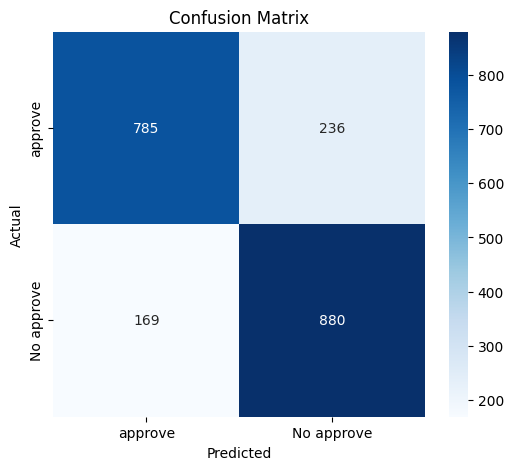

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['approve', 'No approve'], yticklabels=['approve', 'No approve'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.metrics import precision_score,recall_score, f1_score, accuracy_score

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average="weighted"))

print('Recall:', recall_score(y_test, y_pred, average="weighted"))

print('F1 Score:', f1_score(y_test, y_pred, average="weighted"))


Accuracy: 0.8043478260869565
Precision: 0.8054586889058121
Recall: 0.8043478260869565
F1 Score: 0.8040565813506263


In [ ]:
df

,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,Churn
0,1,0,1,0,2,0,0,0,0
1,0,0,34,2,0,2,0,1,0
2,0,0,2,2,2,0,0,0,1
3,0,0,45,2,0,2,2,1,0
4,0,0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
10343,0,0,57,0,2,2,0,1,1
10344,0,0,1,0,0,0,0,0,1
10345,0,0,1,0,0,0,0,0,1
10346,0,0,60,0,1,0,1,1,1


In [ ]:
Partner=float(input("Enter Partner:"))
Dependents=float(input("Enter Dependents:"))
tenure=float(input("Enter tenure:"))
MultipleLines=float(input("Enter MultipleLines:"))
OnlineSecurity=float(input("Enter OnlineSecurity:"))
OnlineBackup=float(input("Enter OnlineBackup:"))
TechSupport=float(input("Enter TechSupport:"))
Contract=float(input("Enter Contract:"))
user_input=[[Partner, Dependents, tenure, MultipleLines, OnlineSecurity, OnlineBackup, TechSupport, Contract]]
Churn=model.predict(user_input)
print("Churn:", Churn)